In [4]:
import os
os.path.exists(DATA_DIR /'images'/'whatsapp_cover.png')

True

In [9]:
import cv2
from config import PROJECT_DIR, DATA_DIR
cv2.imread(DATA_DIR /'images'/'whatsapp_cover.png', 1)

SystemError: <built-in function imread> returned NULL without setting an error

In [2]:
# base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib
%matplotlib inline
plt.style.use('ggplot')

# display
from IPython.display import display

# autoreload
%load_ext autoreload
%autoreload 2

# warnings
import warnings
warnings.filterwarnings('ignore')

# fix random seed
from numpy.random import seed as set_random_seed
set_random_seed(42)

# explainability
# import shap, lime, eli5
# shap.initjs()

#mlflow
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000/")


#streamlit - delteuse
import streamlit as st
def cache(f):
    return f
st.cache = cache

## util functions
def eval_print(obj_str):
    import inspect
    frame = inspect.currentframe()
    try:
        locals().update(frame.f_back.f_locals)
        x = eval(obj_str)
        print(f'{obj_str}: {x}')
    finally:
        del frame

def findFiles(path): 
    import glob
    return glob.glob(path)

In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rc

In [3]:
from utils import read_chat
chat = read_chat()

In [4]:
print(chat)

                 datetime                 name  \
0     2018-05-10 13:45:00          Alon Wolf 🐺   
1     2018-05-10 13:45:00          Alon Wolf 🐺   
2     2018-05-10 13:46:00          Alon Wolf 🐺   
3     2018-05-10 13:47:00  גורגמל ״מצחיקונת״ 🍠   
4     2018-05-10 13:47:00  גורגמל ״מצחיקונת״ 🍠   
...                   ...                  ...   
39994 2020-11-20 07:46:00          Alon Wolf 🐺   
39995 2020-11-20 07:46:00          Alon Wolf 🐺   
39996 2020-11-20 07:47:00          Alon Wolf 🐺   
39997 2020-11-20 07:47:00          Alon Wolf 🐺   
39998 2020-11-20 08:12:00          Alon Wolf 🐺   

                                                    text  
0                        איזה אתרים קדושים יש בירושלים\r  
1      לפי מקומות - תל-אביב - 'משימה שקשורה לים'\r\nי...  
2                                            לדוגמא 👆🏼\r  
3                                    זה מה שאני אמרתי!\r  
4                              תעשה בירושלים את הפלאפל\r  
...                                          

In [5]:
from apps.statistics import get_text_for_name

In [7]:
names = chat['name'].unique()

In [8]:
name = chat['name'].unique()[0]
text = get_text_for_name(chat, name)
name

'Alon Wolf 🐺'

In [9]:
def average_massage(char):
    count = text.str.contains(char).sum()
    if count == 0:
        return 'אף פעם'
    return int(np.round(len(text) / count))
average_massage('❤')

17

In [10]:
average_massage('אוהב')

96

In [11]:
average_massage('אוהב אותך')

185

In [12]:
average_massage('מתגעגע')

349

In [14]:
import emoji
average_massage('[' + ''.join(list(emoji.UNICODE_EMOJI['en'].keys()))+ ']')

4

In [15]:
def tokenize_text(text):
    return text.str.split(' ')

In [17]:
def average_massage_len():
    return np.round(tokenize_text(text).apply(len).sum() / len(text), 2)
average_massage_len()

3.83

In [18]:
def max_massage_len():
    return max(tokenize_text(text).apply(len))
max_massage_len()

438

<AxesSubplot:ylabel='Frequency'>

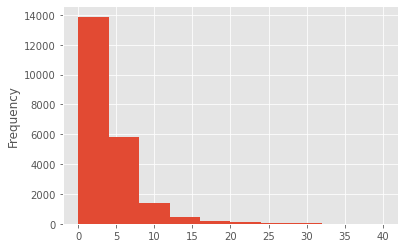

In [19]:
series = tokenize_text(text).apply(len)
series.plot.hist(range = (0,np.quantile(series,0.998)))

In [99]:
np.histogram(series, bins = 50, range = (0,np.quantile(series,0.998)))

(array([   0, 7102, 3164, 3618,    0, 2326, 1635, 1116,  773,    0,  515,
         379,  293,  183,    0,  156,  141,  105,   58,    0,   53,   55,
          28,   36,    0,   40,   18,   18,   15,    0,   11,   11,    6,
          10,    0,    7,    5,    6,    8,    0,    2,    4,    0,    5,
           0,    3,    3,    4,    2,    5], dtype=int64),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2, 24. , 24.8, 25.6,
        26.4, 27.2, 28. , 28.8, 29.6, 30.4, 31.2, 32. , 32.8, 33.6, 34.4,
        35.2, 36. , 36.8, 37.6, 38.4, 39.2, 40. ]))

Alon Wolf 🐺            0.520581
גורגמל ״מצחיקונת״ 🍠    0.479419
Name: name, dtype: float64

In [32]:
def first_massage(chat, name):
    first_massage_by_date = chat.groupby(chat['datetime'].dt.date).first()['name']
    fm_vc = first_massage_by_date.value_counts() / len(first_massage_by_date)
    return np.round(fm_vc[name], 2)
str(int(first_massage(chat, name) * 100))+ '%'

'52%'

In [37]:
dates = chat['datetime'].dt.date
chat_by_date = chat[dates == dates[0]]

In [38]:
chat_by_date

,datetime,name,text
0,2018-05-10 13:45:00,Alon Wolf 🐺,איזה אתרים קדושים יש בירושלים\r
1,2018-05-10 13:45:00,Alon Wolf 🐺,לפי מקומות - תל-אביב - 'משימה שקשורה לים'\r\nי...
2,2018-05-10 13:46:00,Alon Wolf 🐺,לדוגמא 👆🏼\r
3,2018-05-10 13:47:00,גורגמל ״מצחיקונת״ 🍠,זה מה שאני אמרתי!\r
4,2018-05-10 13:47:00,גורגמל ״מצחיקונת״ 🍠,תעשה בירושלים את הפלאפל\r
5,2018-05-10 13:51:00,Alon Wolf 🐺,<המדיה לא נכללה>\r
6,2018-05-10 13:52:00,Alon Wolf 🐺,זה נכון חחח\r
7,2018-05-10 13:54:00,גורגמל ״מצחיקונת״ 🍠,אולי בהקשר של תל אביב וים למרוח קרם הגנה\r
8,2018-05-10 13:54:00,גורגמל ״מצחיקונת״ 🍠,לא יודעת בדיוק מה התחרות 😂 אבל משהו עם קרם הגנה\r
9,2018-05-10 13:54:00,Alon Wolf 🐺,חחחח אפשרי\r


In [ ]:
chat['datetime']

In [43]:
from datetime import timedelta

In [64]:
chat_by_date['datetime'].shape

(49,)

In [57]:
chat_by_date['datetime'].diff()

0         NaT
1    00:00:00
2    00:01:00
3    00:01:00
4    00:00:00
5    00:04:00
6    00:01:00
7    00:02:00
8    00:00:00
9    00:00:00
10   00:02:00
11   00:00:00
12   00:02:00
13   00:00:00
14   00:01:00
15   00:00:00
16   00:05:00
17   00:01:00
18   00:01:00
19   00:00:00
20   01:13:00
21   00:00:00
22   00:00:00
23   00:02:00
24   00:00:00
25   00:14:00
26   00:02:00
27   00:04:00
28   00:00:00
29   00:00:00
30   00:01:00
31   00:00:00
32   00:02:00
33   00:05:00
34   00:14:00
35   00:51:00
36   00:00:00
37   02:50:00
38   00:21:00
39   00:46:00
40   00:04:00
41   00:07:00
42   00:00:00
43   00:00:00
44   00:22:00
45   00:17:00
46   00:00:00
47   00:21:00
48   00:00:00
Name: datetime, dtype: timedelta64[ns]

In [107]:
@st.cache
def _get_mesanens(chat):
    diff_time = chat['datetime'].diff() < timedelta(minutes=60)
    conv_idx = np.where(~diff_time)[0]
    conversations = [(conv_idx[i], conv_idx[i+1]) for i in range(len(conv_idx) - 1)]
    sihut_count = {name: 0 for name in names}
    mesanen_count = {name: 0 for name in names}

    print(1)

    def get_first_of_conv(conv):
        return conv.iloc[0]['name']
    def is_mesanen(conv):
        return conv['name'].nunique() == 1

    for c_s, c_e in conversations:
        conv = chat.iloc[c_s: c_e]
        if is_mesanen(chat.iloc[c_s: c_e]):
            mesanen_count[get_first_of_conv(conv)] += 1
        sihut_count[get_first_of_conv(conv)] += 1

    mesanen_precent = {names[idx]: np.round(mesanen_count[names[idx]] / sihut_count[names[2 + int(~bool(idx))]], 2) for idx in range(len(names))}
    return mesanen_count, sihut_count, mesanen_precent
#     display(chat.iloc[c_s: c_e])
#     print()

In [108]:
mesanen_count, sihut_count, mesanen_precent = _get_mesanens(chat)

1


In [ ]:
print('')

In [98]:
sihut_count

{'Alon Wolf 🐺': 2121, 'גורגמל ״מצחיקונת״ 🍠': 1858}

In [119]:
chat_by_date

,datetime,name,text
0,2018-05-10 13:45:00,Alon Wolf 🐺,איזה אתרים קדושים יש בירושלים\r
1,2018-05-10 13:45:00,Alon Wolf 🐺,לפי מקומות - תל-אביב - 'משימה שקשורה לים'\r\nי...
2,2018-05-10 13:46:00,Alon Wolf 🐺,לדוגמא 👆🏼\r
3,2018-05-10 13:47:00,גורגמל ״מצחיקונת״ 🍠,זה מה שאני אמרתי!\r
4,2018-05-10 13:47:00,גורגמל ״מצחיקונת״ 🍠,תעשה בירושלים את הפלאפל\r
5,2018-05-10 13:51:00,Alon Wolf 🐺,<המדיה לא נכללה>\r
6,2018-05-10 13:52:00,Alon Wolf 🐺,זה נכון חחח\r
7,2018-05-10 13:54:00,גורגמל ״מצחיקונת״ 🍠,אולי בהקשר של תל אביב וים למרוח קרם הגנה\r
8,2018-05-10 13:54:00,גורגמל ״מצחיקונת״ 🍠,לא יודעת בדיוק מה התחרות 😂 אבל משהו עם קרם הגנה\r
9,2018-05-10 13:54:00,Alon Wolf 🐺,חחחח אפשרי\r


In [149]:
td = diffs.iloc[0]['diff']

In [163]:
@st.cache
def get_responses_hist(chat):
    responses = chat['name'] != chat['name'].shift(1)
    responses.iloc[0] = False
    idx = np.where(responses)[0]
    
    diffs = pd.DataFrame([{
        'diff' : (chat['datetime'].iloc[i] - chat['datetime'].iloc[i - 1]).seconds / 60,
        'name' : chat['name'].iloc[i]
    } for i in idx], index = idx)
    print(diffs['name'].value_counts())
    hist_data = [diffs[diffs['name'] == name]['diff'] for name in names]
    group_labels = names
    return hist_data, group_labels

In [164]:
hist_data, group_labels = get_responses_hist(chat)

גורגמל ״מצחיקונת״ 🍠    9471
Alon Wolf 🐺            9471
Name: name, dtype: int64


0         True
1         True
2         True
3         True
4         True
         ...  
39994    False
39995    False
39996    False
39997    False
39998    False
Name: datetime, Length: 39999, dtype: bool

In [172]:
chatt = chat[chat['datetime'].dt.year < 2019]
responses = chatt['name'] != chatt['name'].shift(1)
responses.iloc[0] = False
idx = np.where(responses)[0]

diffs = pd.DataFrame([{
    'diff' : (chatt['datetime'].iloc[i] - chatt['datetime'].iloc[i - 1]).seconds / 60,
    'name' : chatt['name'].iloc[i]
} for i in idx], index = idx)
print(diffs['name'].value_counts())
hist_data = [diffs[diffs['name'] == name]['diff'] for name in names]
group_labels = names

גורגמל ״מצחיקונת״ 🍠    2438
Alon Wolf 🐺            2437
Name: name, dtype: int64


In [166]:
diffs

,diff,name
3,1.0,גורגמל ״מצחיקונת״ 🍠
5,4.0,Alon Wolf 🐺
7,2.0,גורגמל ״מצחיקונת״ 🍠
9,0.0,Alon Wolf 🐺
10,2.0,גורגמל ״מצחיקונת״ 🍠
...,...,...
39980,1.0,Alon Wolf 🐺
39982,1.0,גורגמל ״מצחיקונת״ 🍠
39985,11.0,Alon Wolf 🐺
39988,67.0,גורגמל ״מצחיקונת״ 🍠


In [135]:
before = responses.shift(-1)
# before.index = before.index - 1
before.iloc[-1] = False

In [136]:
chat_by_date[before]

,datetime,name,text
2,2018-05-10 13:46:00,Alon Wolf 🐺,לדוגמא 👆🏼\r
4,2018-05-10 13:47:00,גורגמל ״מצחיקונת״ 🍠,תעשה בירושלים את הפלאפל\r
6,2018-05-10 13:52:00,Alon Wolf 🐺,זה נכון חחח\r
8,2018-05-10 13:54:00,גורגמל ״מצחיקונת״ 🍠,לא יודעת בדיוק מה התחרות 😂 אבל משהו עם קרם הגנה\r
9,2018-05-10 13:54:00,Alon Wolf 🐺,חחחח אפשרי\r
11,2018-05-10 13:56:00,גורגמל ״מצחיקונת״ 🍠,לאכול קרטיב בלי ידיים?\r
14,2018-05-10 13:59:00,Alon Wolf 🐺,מה עם 3 אחד על הגב של השני כמו גמל?\r
15,2018-05-10 13:59:00,גורגמל ״מצחיקונת״ 🍠,לא הבנתי\r
16,2018-05-10 14:04:00,Alon Wolf 🐺,שמישהו אחד יצליח להחזיק 2 אנשים על הגב למשך חצ...
18,2018-05-10 14:06:00,גורגמל ״מצחיקונת״ 🍠,רק שיכאב לו הגב אח''כ 😂\r


In [ ]:
series = tokenize_text(text).apply(len)
series.plot.hist(range = (0,np.quantile(series,0.998)))

In [ ]:
def first_massage(chat, name):
    first_massage_by_date = chat.groupby(chat['datetime'].dt.date).first()['name']
    fm_vc = first_massage_by_date.value_counts() / len(first_massage_by_date)
    return np.round(fm_vc[name], 2)

In [112]:
def first_boker(chat, name):
    chat = chat[chat['text'].str.contains('בוקר')]
    first_massage_by_date = chat.groupby(chat['datetime'].dt.date).first()['name']
    fm_vc = first_massage_by_date.value_counts() / len(first_massage_by_date)
    return np.round(fm_vc[name], 2)
first_boker(chat, name)

0.46

In [114]:
def first_night(chat, name):
    chat = chat[chat['text'].str.contains('לילה')]
    first_massage_by_date = chat.groupby(chat['datetime'].dt.date).first()['name']
    fm_vc = first_massage_by_date.value_counts() / len(first_massage_by_date)
    return np.round(fm_vc[name], 2)
first_night(chat, name)

0.57

# ClearML

In [2]:
from clearml import Task
task = Task.init(project_name="wolf_test", task_name="wolf_test")

In [ ]:
Task.current_task().upload_artifact(name='a_file', artifact_object='local_file.bin')
Task.current_task().upload_artifact(name='numpy', artifact_object=np.ones(4,4))

In [ ]:
from clearml import Logger
Logger.current_logger().report_scalar(graph='metric', series='variant', value=13.37, iteration=counter)